In [1]:
import numpy as np
import pickle
import os
import math
import matplotlib.pyplot as plt
import math
import numpy as np
import sys
sys.path
sys.path.append('../models')
sys.path.append('../simulation')
import TS_personal_params_pooled as pp
import TS_global_params_pooled as gtp
%matplotlib inline


In [2]:
def get_results(results_path,pop_size,update_time,case,phrase,ophrase):
    
    
    files = os.listdir('{}{}'.format(results_path,case))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and ophrase not in f and 'update_days_{}'.format(update_time) in f  and '2015' not in f    ]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    regrets = {}
    actions = {}
    mus = {}
    for ff in files:
        #sim = int(ff.split('sim_')[1].strip('_continuous_pretreatment_base_coef_scale_hybrid.pkl'))
        #try:
        with open('{}{}/{}'.format(results_path,case,ff),'rb') as f:
            d = pickle.load(f)
            #return d
            #print(d.keys())
            if len(d)>0:
            #if int(sim)<60:
                #print(len([k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]))
                steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]
                for k,v in d['actions'].items():
                    if k not in actions:
                        actions[k]=[]
                    actions[k].extend(v)
                for k,v in d['regrets'].items():
                    if k not in regrets:
                        regrets[k]=[]
                    regrets[k].extend(v)
            seen = seen+1
           # print(ff)
    print(seen)
    return {'steps':steps,'regrets':regrets,'actions':actions}

In [3]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot
def get_to_plot_regrets(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(np.array(actions[k]).mean())
    return to_plot

In [4]:
def plot_and_save_dict(d,title,save_title,save=False,i=None,ax=None):
    x =get_to_plot_actions(d['actions'])
    print(np.array(x[150:]).mean())
    #plt.figure(1) 
    #ax[0][i].ylim(.45,1)
    #ax[0][i].yticks(np.arange(.45, 1, step=0.15))
    ax[0][i].plot(x)
    
    plt.ylabel('Percent correct action ')
    plt.xlabel('Decision times')
    plt.title(title)
    if save:
        plt.savefig('{}_{}_percent_correct_action.png'.format(save_title,title))
    to_plotr =  get_to_plot_regrets(d['regrets'])
    #plt.figure(2) 
#to_plotr = [to_plotr[i] for i in range(0,len(to_plotr),5)]
    ax[1][i].plot(to_plotr)
    plt.ylabel('Regret')
    plt.xlabel('Decision times')
    plt.title(title)
    if save:
        plt.savefig('{}_{}_regret.png'.format(save_title,title))

In [7]:
def plot_all(results_path,pop,update,phrase,ophrase):
    fig, ax = plt.subplots(nrows=2, ncols=3)
    fig.tight_layout()
    #'case_one','case_two',
    cases = ['case_three']
    plt.setp(ax[0,:],  yticks = np.arange(.3, 1, step=0.15),ylim = [.45,1])
    plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    for i in range(len(cases)):
        case = cases[i]
        d = get_results(results_path,str(pop),update,cases[i],phrase,ophrase)
        
        plot_and_save_dict(d,case,case,save=False,i=i,ax=ax)

50
0.6379927524487999


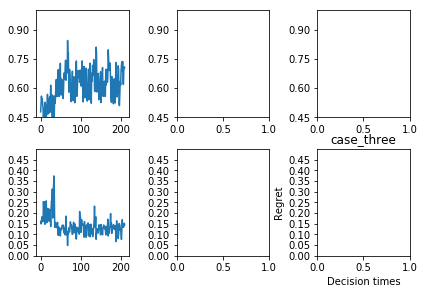

In [10]:
plot_all('../../Downloads/pooling_results/batch/','32',7,'_loc_4_18.pkl','coef')


50
0.6758990963103527


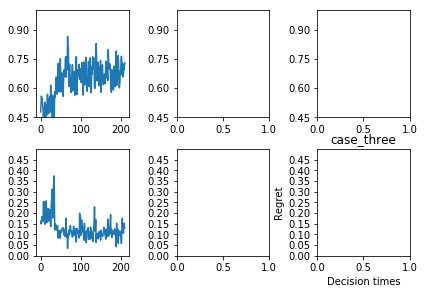

In [9]:
plot_all('../../Downloads/pooling_results/personalized/','32',7,'_loc_4_18.pkl','coef')


51
0.6425064425408978


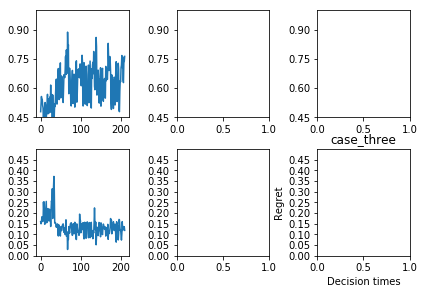

In [11]:
plot_all('../../Downloads/results_4_18/pooling/','32',7,'_loc_4_18tt.pkl','coef')


51
0.5731156020381111
51
0.6721511923910594
51
0.6936533509668307


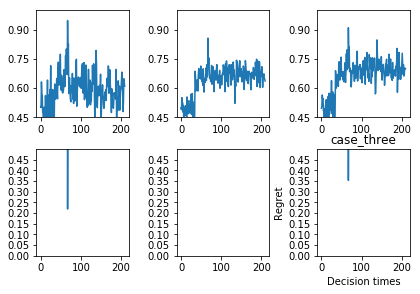

In [217]:
plot_all('../../Downloads/results_4_16/results/','32',7,'sigmauagain')

In [208]:
import shutil

In [214]:
case_one = [f for f in os.listdir('../../Downloads/results_4_16/results') if '.pkl' in f and 'case_three' in f]

In [215]:
for f in case_one:
    shutil.copyfile('../../Downloads/results_4_16/results/{}'.format(f),'../../Downloads/results_4_16/results/case_three/{}'.format(f))

In [12]:
fn ='population_size_32_update_days_7_short_static_sim_50_loc_4_18tt.pkl'

In [13]:
with open('{}{}'.format('../../Downloads/results_4_18/pooling/case_three/',fn),'rb') as f:
    test = pickle.load(f)




In [14]:
test['pprams'].mus2

{0: array([204.97528437,  54.45029088]),
 1: array([201.36145591,  54.45029088]),
 2: array([190.98379374,  54.45029088]),
 3: array([186.91915872,  54.45029088]),
 4: array([187.84656189,  54.45029088]),
 5: array([206.48394399,  54.45029088]),
 6: array([196.75446542,  54.45029088]),
 7: array([188.73076813,  54.45029088]),
 8: array([199.786519  ,  54.45029088]),
 9: array([206.9623043 ,  54.45029088]),
 10: array([185.16833963,  54.45029088]),
 11: array([192.22524999,  54.45029088]),
 12: array([180.87536317,  54.45029088]),
 13: array([187.07536871,  54.45029088]),
 14: array([179.92169145,  54.45029088]),
 15: array([212.73214564,  54.45029088]),
 16: array([206.1999925 ,  54.45029088]),
 17: array([217.26074162,  54.45029088]),
 18: array([192.31247648,  54.45029088]),
 19: array([195.21261714,  54.45029088]),
 20: array([200.02224466,  54.45029088]),
 21: array([199.16769635,  54.45029088]),
 22: array([207.6679676 ,  54.45029088]),
 23: array([193.33065737,  54.45029088]),
 2